#### load libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


#### declare arguments

In [3]:
ppagecat = {1:'18-24',2:'25-34',3:'35-44',4:'45-54',5:'55-64',6:'65-74',7:'75+',99:'Under 18'}
ppeducat = {-2:'Not asked',-1:'REFUSED',1:'Less than high school',2:'High school',3:'Some college',4:'Bachelor''s degree or higher'.

#### parse data

In [4]:
surveys = pd.read_csv('MMdata_merged.csv')
surveys.head()

,CaseID,weight,tm_start,tm_finish,duration,C1,C2,C3,I1,I2,...,pppa0097,pppa0098,pppa0099,pppa0100,pppa0101,pppa0102,partyid7,pppa0005,pppa0006,ppp20072
0,2,1.05,3/10/2012,3/10/2012,46,3,3,3,2,3,...,0,0,0,0,0,0,3,1,2,5
1,3,2.60,3/10/2012,3/10/2012,39,4,2,3,1,2,...,0,0,0,0,1,0,5,1,1,5
2,4,0.69,3/10/2012,3/11/2012,1453,3,3,4,4,3,...,0,0,0,0,0,0,2,1,2,1
3,5,1.74,3/10/2012,3/10/2012,45,5,1,4,3,3,...,1,0,0,0,1,0,7,1,1,5
4,6,2.43,3/10/2012,3/10/2012,26,4,4,4,2,2,...,0,0,0,0,0,0,7,1,1,6


In [5]:
surveys.shape

(1519, 451)

In [6]:
new_surveys = pd.DataFrame(surveys[['weight','tm_start','tm_finish','duration']],index=surveys['CaseID'])

In [7]:
new_surveys['age_category'] = surveys['ppagecat'].apply(lambda x: ppagecat[x])

In [8]:
new_surveys.head()

,weight,tm_start,tm_finish,duration,age_category
CaseID,,,,,
2,0.69,3/10/2012,3/11/2012,1453,25-34
3,1.74,3/10/2012,3/10/2012,45,35-44
4,2.43,3/10/2012,3/10/2012,26,35-44
5,2.72,3/10/2012,3/10/2012,25,35-44
6,0.42,3/10/2012,3/10/2012,207,45-54


#### show data slices

KeyboardInterrupt: 

/Library/Python/2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


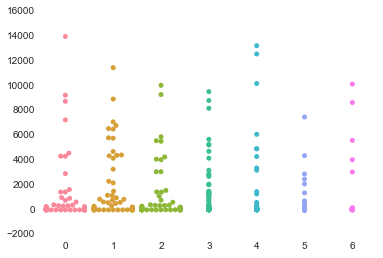

In [9]:
sns.swarmplot(x="age_category", y="duration", data=new_surveys);